# Jonathan Halverson
# Tuesday, March 15, 2016
# Inference for categorical data

In [165]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

### Generate a sample of 0's and 1's with E[X]=0.82:

In [166]:
from scipy.stats import bernoulli as bern
population = bern.rvs(p=0.82, size=100000)

In [167]:
def proportion(x):
    x = np.asarray(x)
    return sum(x) / float(x.size)

In [168]:
import random
def sample_mean_std(population, sample_size):
    """Return the mean and standard deviation for a
       sample of the populations."""
    s = np.array(random.sample(population, sample_size))
    return s.mean(), s.std(ddof=1)

In [169]:
p_population = proportion(population)
print p_population

0.82144


### Let's make  a sampling distribution with sample size n=50 and compare the std to the SE formula:

In [170]:
samples = 1000
pairs = [sample_mean_std(population, sample_size=50) for _ in range(samples)]
means, stds = zip(*pairs)
print sum(means) / len(means), np.array(means).std()

0.81926 0.05460267759


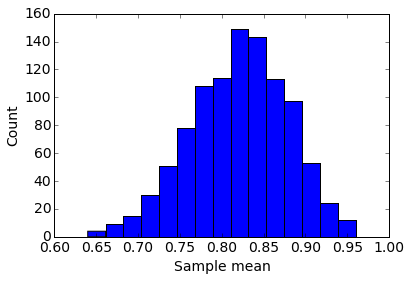

In [171]:
n, bins, patches = plt.hist(means, bins=15, align='mid')
plt.xlabel("Sample mean")
plt.ylabel("Count")

In [172]:
print np.array(means).std(), population.std() / np.sqrt(50), np.sqrt(p_population * (1.0 - p_population) / 50)

0.05460267759 0.054162039548 0.054162039548


### The calculation above shows that the standard error for a proportion is indeed $\sqrt{\frac{p(1-p)}{n}}$.

### The success-failure condition requires np and n(p-1) are both at least 10. When this is satisfied, and the values are independent, then the sampling distribution is normal and one may apply the standard CI and hypothesis tests.

### In general, we will not know the population proportion. Use the sample proportion of the last sample to calculate the standard error:

In [173]:
p_hat = proportion(random.sample(population, 50))
print p_hat

0.84


In [174]:
np.sqrt(p_hat * (1.0 - p_hat) / 50)

0.051845925587262885

# Hypothesis testing

### Use the null value instead of the sample proportion to estimate the standard error for hypothesis testing.

###A simple random sample of 1,028 US adults in March 2013 found that 56% support nuclear arms reduction. Does this provide convincing evidence that a majority of Americans supported nuclear arms reduction at the 5% significance level?

In [175]:
from scipy.stats import norm
SE = np.sqrt(0.5 * (1.0 - 0.5) / 1028)
z_score = (0.56 - 0.5) / SE
p_value = 1.0 - norm.cdf(z_score)
print SE, z_score, p_value, p_value > 0.05

0.0155945715388 3.84749269005 5.96664183107e-05 False


# Difference of two proportions

### A 30-year study was conducted with nearly 90,000 female participants.8 During a 5- year screening period, each woman was randomized to one of two groups: in the first group, women received regular mammograms to screen for breast cancer, and in the second group, women received regular non-mammogram breast cancer exams. No intervention was made during the following 25 years of the study, and we’ll consider death resulting from breast cancer over the full 30-year period.

In [176]:
p_trmt = 500 / float(500 + 44425)
p_ctrl =  505 / float(505 + 44405)
p_hat = (500 + 505) / float(500 + 44425 + 505 + 44405)
diff = p_trmt - p_ctrl
print p_trmt, p_ctrl, p_hat, diff

0.0111296605454 0.0112447116455 0.0111871764902 -0.00011505110016


### Check the success-failure condition:

In [177]:
p_hat * 44925 > 10, (1.0 - p_hat) * 44925 > 10, p_hat * 44910 > 10, (1.0 - p_hat) * 44910 > 10

(True, True, True, True)

In [178]:
SE = np.sqrt(p_trmt * (1.0 - p_trmt) / (500 + 44425) + p_ctrl * (1.0 - p_ctrl) / (505 + 44405))
SE_ = np.sqrt(p_hat * (1.0 - p_hat) / (500 + 44425) + p_hat * (1.0 - p_hat) / (505 + 44405))
print SE, SE_

0.000701818495267 0.000701818004484


### Create a 90% confidence interval (here we don't use the pooled estimate for p):

In [181]:
diff + 1.65 * SE, diff - 1.65 * SE

(0.0010429486072392352, -0.0012730508075589988)

In [179]:
z_score = (diff - 0.0) / SE_
p_value = 2 * norm.cdf(z_score)

In [180]:
print z_score, p_value, p_value > 0.05

-0.163932956158 0.869783922786 True


### We fail to reject the null hypothesis that the proportions are the same.

### Here's a problem where the null value is not zero. The quality control engineer collects a sample of blades, examining 1000 blades from each company and finds that 899 blades pass inspection from the current supplier and 958 pass inspection from the prospective supplier. Using these data, evaluate the hypothesis setup with a significance level of 5%. The null value is 0.03 or the prospective blades are at least 3% better by proportion.

In [187]:
p_curr = 899 / 1000.0
p_pros = 958 / 1000.0
diff = p_pros - p_curr
print diff

0.059


In [186]:
SE = np.sqrt(p_curr * (1.0 - p_curr) / 1000 + p_pros * (1.0 - p_pros) / 1000) 
print SE

0.0114470520222


In [189]:
z_score = (diff - 0.03) / SE
print z_score

2.53340335517


In [192]:
p_value = 1.0 - norm.cdf(z_score)
print p_value, p_value > 0.05

0.00564804425358 False


### We conclude that the new blades should be purchased.